In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
data_path = "googleplaystore.csv (2).zip"  
data = pd.read_csv(data_path)

In [3]:
data.columns = data.columns.str.strip().str.lower().str.replace(" ", "_")

In [4]:
data['installs'] = (data['installs'].astype(str).str.replace('[+,]', '', regex=True).replace('Free', '0').astype(float))
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')
data['reviews'] = pd.to_numeric(data['reviews'], errors='coerce')
data['last_updated'] = pd.to_datetime(data['last_updated'], errors='coerce')

In [5]:
min_rating = 4.0
min_installs = 10_000_000
jan_month_filter = data['last_updated'].dt.month == 1

In [6]:
filtered_data = data[(data['rating'] >= min_rating) & (data['installs'] >= min_installs) & jan_month_filter]

In [9]:
category_stats = filtered_data.groupby('category').agg(average_rating=('rating', 'mean'),total_reviews=('reviews', 'sum')
).reset_index()

In [10]:
top_categories = filtered_data.groupby('category')['installs'].sum().nlargest(10).index
top_category_stats = category_stats[category_stats['category'].isin(top_categories)]

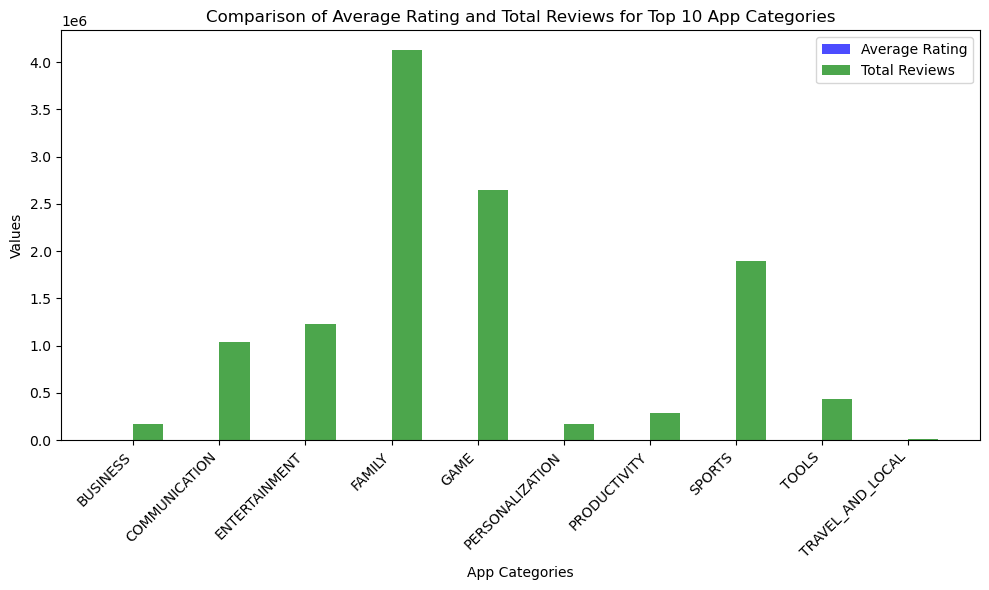

In [13]:
def plot_chart():
    categories = top_category_stats['category']
    avg_rating = top_category_stats['average_rating']
    total_reviews = top_category_stats['total_reviews']

    x = range(len(categories))
    width = 0.35

    fig, ax = plt.subplots(figsize=(10, 6))

    ax.bar(x, avg_rating, width, label='Average Rating', color='b', alpha=0.7)
    ax.bar([p + width for p in x], total_reviews, width, label='Total Reviews', color='g', alpha=0.7)

    ax.set_xlabel('App Categories')
    ax.set_ylabel('Values')
    ax.set_title('Comparison of Average Rating and Total Reviews for Top 10 App Categories')
    ax.set_xticks([p + width/2 for p in x])
    ax.set_xticklabels(categories, rotation=45, ha='right')
    ax.legend()

    plt.tight_layout()
    plt.show()
current_time = datetime.now()
if 15 <= current_time.hour < 17: 
    plot_chart()
else:
    print("This chart is only viewable between 3 PM and 5 PM IST.")